<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

# Добрый день, добро пожаловать на 3-й эпизод голодных аналитических игр, в прошлый раз проект зачёлся без пометок и не только у меня (я сначада думал, что один такой, а потом слак открыл и...), постараюсь сделать работу также качественно, т.к. пока курс не сложный.

In [1]:
#Подгрузим все известные бибилиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
#Загружаем датасеты для просмотра
mega_users = pd.read_csv('/datasets/users.csv')
mega_calls = pd.read_csv('/datasets/calls.csv')
mega_messages = pd.read_csv('/datasets/messages.csv')
mega_internet = pd.read_csv('/datasets/internet.csv')
mega_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
#Начнём осмотр
#Первый датасет
mega_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
mega_users.head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
mega_users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [6]:
#второй датасет
mega_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
mega_calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [8]:
mega_calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [9]:
#Третий датасет
mega_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
mega_messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [11]:
mega_messages.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [12]:
#Четвертый датасет
mega_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
mega_internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [14]:
mega_internet.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [15]:
#Пятый датасет
mega_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
mega_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
mega_tariffs.describe().T

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


Подведём итоги по просмотру:
1) по датасету "mega_users", столбцы 'churn_date', 'reg_date' - тип данных должен быть не 'object' т.к. содержит дату, кроме того есть пропуски ('churn_date'), необходимо изменить тип данных и заполнить пропуски т.к. столбец понадобится при подведении итогов исследования;
2) по датасету "mega_calls", столбец "duration" - содержит длительность звонка 0 минут, в задании на это обращено внимание, столбец 'call_date' должен быть не object т.к. содержит дату;
3) по датасету "message_date", столбец - message_date - должен быть не object т.к. содержит дату, необходимо изменить тип данных;
4) по датасету "mega_internet", столбец "mb_used" - объём потраченного за сессию интернет-трафика (в мегабайтах), есть 0 значение", в целом возможно, что действительно не пользовались пакетом трафика либо этот трафик не был оплачен, столбец - "Unnamed: 0" – неизвестно, что это, совпадает с id думаю можно удалить (но сначала сравнить с id, т.к. есть сходства), столбец - "session_date" - должен быть не object т.к. содержит дату.
5) датасет "mega_tariffs" - идеален, что даже не верится в это.

По содержимому становится, ясно, что упор в проекте необходимо сделать на новом материале (дисперсия, отклонение, теория вероятности), как и в ранее выполненынх проектах.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Молодец, что провёл первичный анализ полученных данных, это всегда быстро помогает понять с чем предстоит работать, по выводам нареканий нет - всё верно и точно
</div>

In [18]:
#Сначала изменим тип данных в "датированных" столбцах
mega_users['churn_date'] = pd.to_datetime(mega_users['churn_date'], format="%Y-%m-%d")
mega_users['reg_date'] = pd.to_datetime(mega_users['reg_date'], format="%Y-%m-%d")
mega_calls['call_date'] = pd.to_datetime(mega_calls['call_date'], format="%Y-%m-%d")
mega_messages['message_date'] = pd.to_datetime(mega_messages['message_date'], format="%Y-%m-%d")
mega_internet['session_date'] = pd.to_datetime(mega_internet['session_date'], format="%Y-%m-%d")

In [19]:
mega_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [20]:
#Т.к. провайдер видимо застрял в начале эпохи становления капитала то он всё округляет в свою пользу, 
#сделаем тоже самое со столбцом "duration" в mega_calls
mega_calls['duration'] = mega_calls['duration'].apply(np.ceil)
mega_calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


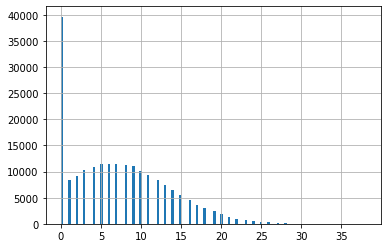

In [21]:
#Проверим построением графика по столбцу "duration", точно ли всё хорошо со звонками
mega_calls['duration'].hist(bins='auto')
mega_calls.query('duration == 0.0')

In [22]:
#Не уверен, что это проблема, 
#скорее всего это звонки позвонил-сбросил, они не тарифицируются, 
#это просто факты использования (точнее не использования) услуг связи

In [23]:
#Удалим эти значения
mega_calls['duration'] = mega_calls['duration'].replace(0, np.NaN)
mega_calls = mega_calls.dropna()
mega_calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000


In [24]:
#По аналогии проведем такую же работу со столбцом "mb_used" в mega_internet
mega_internet['mb_used'] = mega_internet['mb_used'].apply(np.ceil)
mega_internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000
5,5,1000_5,400.0,2018-10-02,1000
6,6,1000_6,541.0,2018-09-07,1000
7,7,1000_7,416.0,2018-07-11,1000
8,8,1000_8,506.0,2018-10-08,1000
9,9,1000_9,346.0,2018-09-03,1000


,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


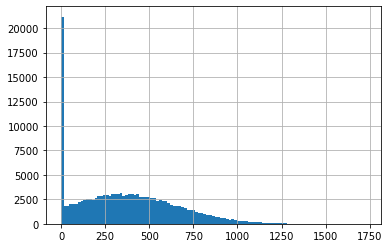

In [25]:
#Проверим построением графика по столбцу "mb_used", точно ли всё хорошо трафиком
mega_internet['mb_used'].hist(bins='auto')
mega_internet.query('mb_used == 0.0')

In [26]:
#Точно такая же картина как и со звонками, удаляем эти нули
mega_internet['mb_used'] = mega_internet['mb_used'].replace(0, np.NaN)
mega_internet = mega_internet.dropna()
mega_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000


In [27]:
#Столбец "Unnamed: 0" в mega_internet оказался судя по яндексу глюком сохранения CSV файла. Удаляем его.
del mega_internet['Unnamed: 0']
mega_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


# Количество сделанных звонков и израсходованных минут разговора по месяцам

In [28]:
#Добавим название месяцев
mega_calls['month'] = pd.DatetimeIndex(mega_calls['call_date']).month
mega_calls.head(15)

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
10,1000_10,2018-08-22,6.0,1000,8
11,1000_11,2018-05-28,19.0,1000,5
12,1000_12,2018-07-05,3.0,1000,7
13,1000_13,2018-09-29,8.0,1000,9
14,1000_14,2018-12-11,10.0,1000,12


In [29]:
#Проведём группировку по нужным параметрам
group_calls = mega_calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'duration_month','id':'total_calls_month'})\

In [30]:
group_calls.head(5)

,user_id,month,duration_month,total_calls_month
0,1000,5,159.0,17
1,1000,6,172.0,28
2,1000,7,340.0,41
3,1000,8,408.0,42
4,1000,9,466.0,46


# Количество отправленных сообщений по месяцам

In [31]:
mega_messages['month'] = pd.DatetimeIndex(mega_messages['message_date']).month
mega_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [32]:
group_messages = mega_messages.groupby(['user_id','month'])\
                  .agg({'id':'count'})\
                  .reset_index()\
                  .rename(columns={'id':'total_sms_month'})

In [33]:
group_messages.head(5)

,user_id,month,total_sms_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


# Объем израсходованного интернет-трафика по месяцам

In [34]:
mega_internet['month'] = pd.DatetimeIndex(mega_internet['session_date']).month
mega_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9


In [35]:
group_internet = mega_internet.groupby(['user_id', 'month'])\
                  .agg({'mb_used':'sum'})\
                  .reset_index()\
                  .rename(columns={'mb_used':'total_mb_month'})\

In [36]:
group_internet.head()

,user_id,month,total_mb_month
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


In [37]:
#Преподаватель в слаке рекомендовал использовать merge вместо join
#Если использовать тип склейки inner то к названиям столбцом добавляются символы и конечная склейка с тарифом не идёт
data = group_calls.merge(group_messages, on=['user_id','month'], how='outer')
data.head(5)

,user_id,month,duration_month,total_calls_month,total_sms_month
0,1000,5,159.0,17.0,22.0
1,1000,6,172.0,28.0,60.0
2,1000,7,340.0,41.0,75.0
3,1000,8,408.0,42.0,81.0
4,1000,9,466.0,46.0,57.0


In [38]:
data = data.merge(group_internet, on=['user_id','month'], how = 'outer')
data.head(5)

,user_id,month,duration_month,total_calls_month,total_sms_month,total_mb_month
0,1000,5,159.0,17.0,22.0,2256.0
1,1000,6,172.0,28.0,60.0,23257.0
2,1000,7,340.0,41.0,75.0,14016.0
3,1000,8,408.0,42.0,81.0,14070.0
4,1000,9,466.0,46.0,57.0,14581.0


In [39]:
data = data.merge(mega_users, on='user_id', how = 'left')
data.head(5)

,user_id,month,duration_month,total_calls_month,total_sms_month,total_mb_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,17.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,28.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,41.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,42.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,46.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [40]:
mega_tariffs = mega_tariffs.rename(columns={'tariff_name':'tariff'})
#mega_tariffs.info()
data = data.merge(mega_tariffs, on='tariff', how='left')
data.head(5)

,user_id,month,duration_month,total_calls_month,total_sms_month,total_mb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,17.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,28.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,41.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,42.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,46.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


# Помесячная выручка с каждого пользователя

In [41]:
#Функция для подсчета
def over_tariff(row):
    sms = (row['total_sms_month'] - row['messages_included']) * row['rub_per_message']
    mnt = (row['total_calls_month'] - row['minutes_included']) * row['rub_per_minute']
    mgb = np.floor((row['total_mb_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mnt, mgb]:
        if i > 0:
            total += i
    return total

In [42]:
data['over_tariff'] = data.apply(lambda x: over_tariff(x), axis=1)
data['total_pay'] = data['rub_monthly_fee'] + data['over_tariff']
data.sort_values(by='total_pay').tail()

,user_id,month,duration_month,total_calls_month,total_sms_month,total_mb_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_tariff,total_pay
615,1098,12,588.0,63.0,14.0,36568.0,39,NaT,Челябинск,Элеонора,...,smart,50,15360,500,550,200,3,3,4142.0,4692.0
782,1124,10,1225.0,130.0,121.0,49789.0,54,NaT,Махачкала,Альбин,...,ultra,1000,30720,3000,1950,150,1,1,2793.0,4743.0
3099,1486,11,764.0,84.0,96.0,36319.0,35,NaT,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,4231.0,4781.0
260,1042,12,728.0,94.0,75.0,37219.0,42,NaT,Хабаровск,Константин,...,smart,50,15360,500,550,200,3,3,4344.0,4894.0
3100,1486,12,1007.0,115.0,83.0,38610.0,35,NaT,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,4640.0,5190.0


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Этап предобработки закончен, со всеми действиями и выводами согласен, замечательно. Так же порадовало что всё делишь на отдельные ячейки и пишешь выводы, можно приступать к основной части анализа</div>

# Анализ данных

In [43]:
data['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

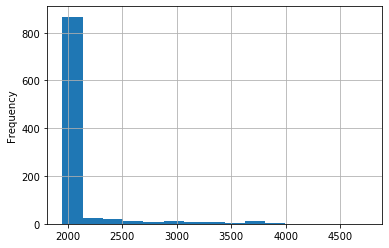

In [44]:
#Построим графики для наглядности распределения платы по тарифам
data[data['tariff'] == 'ultra']['total_pay'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

не забывай подписывать оси на графиках и указывать название для графика

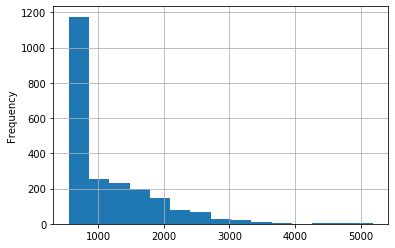

In [45]:
data[data['tariff'] == 'smart']['total_pay'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))

In [58]:
data.groupby('tariff')\
  .agg({'total_pay':['median','mean','var','std']})\
  .style.format("{:.2f}")

In [54]:
data.groupby('tariff')\
  .agg({'duration_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

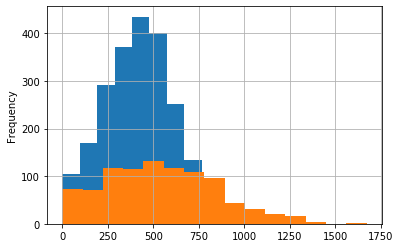

In [49]:
data[data['tariff'] == 'smart']['duration_month'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))
data[data['tariff'] == 'ultra']['duration_month'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))

По описанию тариф "Смарт" в месяц включено 500 минут разговора, пользователи почти полностью выбирают этот лимит
По описанию тариф "Ультра" в месяц включено 3000 минут разговора, запас остаётся более 2500 минут

In [57]:
data.groupby('tariff')\
  .agg({'total_mb_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

По описанию тариф "Смарт" в месяц доступно 15ГБ трафика, есть факты превышения этого лимита на 1 ГБ
По описанию тариф "Ультра" в месяц доступно 30ГБ, тут естественно есть запас по трафику

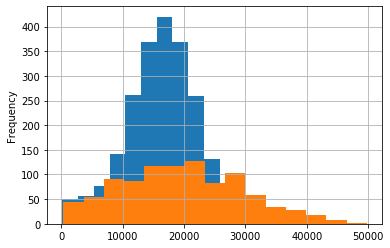

In [51]:
data[data['tariff'] == 'smart']['total_mb_month'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))
data[data['tariff'] == 'ultra']['total_mb_month'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Графики точно нужно строить детальнее, иначе так из графика не понятно, что изображено, если не залазить в код, а заказчики в будущем точно не будут копать в коде, чтобы понять, что перед ними изображено

Графики подтверждают вышенаписанное

In [56]:
data.groupby('tariff')\
  .agg({'total_sms_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

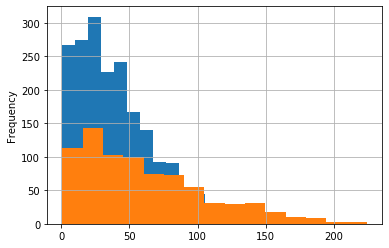

In [53]:
data[data['tariff'] == 'smart']['total_sms_month'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))
data[data['tariff'] == 'ultra']['total_sms_month'].plot(kind='hist', bins=15, grid=True, figsize=(6,4))

По описанию тариф "Смарт" в месяц доступно 50 смс. 
По описанию тариф "Ультра" в месяц доступно 1000 смс.
На обоих тарифах запас по смс приличный, все давно в онлайн.

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Тут всё абсолютно верно, верные выводы, но стоило бы строить больше разнообразных визуализаций, это будет очень важным навыком , который точно пригодится тебе в будущем, так как в любой аналитике графики являются наглядным подтверждением твоих выводов

# Гипотезы и выводы

In [60]:
#Проверка гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
#0-выручка пользователей тарифов «Ультра» и «Смарт» не различается
#1-выручка пользователей тарифов «Ультра» и «Смарт» различается

alpha = 0.05
#таковое значение выбрано в связи с тем, что чем оно меньше вероятность ошибочно отклонить нулевую гипотезу, 
#конкретное значене взято как наиболее вероятностное, 
#кроме того при похожем анализе в среде StatSoft оно установлено именно таким

results = st.ttest_ind(
    data[data['tariff'] == 'ultra']['total_pay'], 
    data[data['tariff'] == 'smart']['total_pay'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.731067552762315e-285
Отвергаем нулевую гипотезу


Действительно различается, выборка не случайна.

In [61]:
#Проверка гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
#0-средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
#1-средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

data['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [73]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Другое')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 23 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration_month           3168 non-null float64
total_calls_month        3168 non-null float64
total_sms_month          2717 non-null float64
total_mb_month           3201 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

In [70]:
moscow = data[data['city'] == 'Москва']
another = data[data['city'] == 'Другое']

In [80]:
moscow = data['total_pay']
another = data['total_pay']

In [81]:
alpha = 0.05
results = st.ttest_ind(moscow, another)

In [82]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


Идеально! Значимых различий нет.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Гипотезы проверены, молодец!)

# Вывод

1. Пользователи дешевого тарифа имеют риск переплаты и совершают его, также выходят за лимит по трафику и звонкам, в то время как у пользователей дорого тарифа лимиты по смс, звонкам, трафику не выбраны.
Операторам стоит предусмотреть возможность использования этих лимитов в пользу абонентов.
2. Тарифы приносят прибыль и она различна, хоть и выгода для потребителя не очевидна при текущих параметрах.
3. По гипотезе №2  получается, что денежные потоки от пользователей в столице или регионах не отличаются, все приносит стабльный доход.
4. В целом оператору стоит пересмотреть тарифную политику, особенно обратить внимание на смс т.к. на конкретных тарифах услуга практически не используется.
И всё таки стоит подумать над округлениями значений, т.к. в 2020 году 1 сек считать за 1 минуту, не очень корректно.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Вывод получился достаточно точным и подробным, здорово! 

Благодарю заранее, за время уделенное моей работе. 
Раздел гипотез это для меня сложно, хотя 3 года в ВУЗе разные направления обучения так или иначе затрагивали этот класс знаний.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Ты проделал отличную работу и я очень рад, что у тебя всё получается!) Надеюсь так будет и в будущем и ты останешься полностью доволен данным курсом!) Удачи тебе в следующих проектах)